<a href="https://colab.research.google.com/github/bekatan/Machine-Learning/blob/main/CNNFashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
def transform(data):
  X = data.drop(columns='label').to_numpy().reshape((len(data), 1, 28, 28)).transpose((0, 2, 3, 1))
  Y = data['label'].to_numpy()
  X = X/255
  return X, Y

In [4]:
train_dataset = pd.read_csv('/content/drive/MyDrive/content/fashion-mnist_train.csv')
test_dataset = pd.read_csv('/content/drive/MyDrive/content/fashion-mnist_test.csv')


X_train, Y_train = transform(train_dataset)
X_test, Y_test = transform(test_dataset)

X_train = X_train[:20000]

Y_train = Y_train[:20000]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(20000, 28, 28, 1) (20000,) (10000, 28, 28, 1) (10000,)


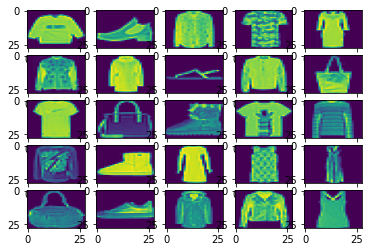

In [5]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(X_train[k].reshape((28,28)), aspect='auto')
		k += 1

plt.show()

In [6]:
i = Input(shape=X_train[0].shape)
x = Conv2D(28, (2, 2), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(28, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(56, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(56, (2, 2), activation='relu' , padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(112, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(112, (2, 2), activation='relu' , padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [7]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


In [8]:
import time
# Fit
start = time.time()
r = model.fit(
X_train, Y_train, validation_data=(X_test, Y_test), epochs=20)
print("training time: ", start-time.time())

Epoch 1/20
625/625 [==============================] - 16s 7ms/step - loss: 0.6007 - accuracy: 0.7971 - val_loss: 0.4330 - val_accuracy: 0.8480
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3606 - accuracy: 0.8702 - val_loss: 0.3418 - val_accuracy: 0.8749
Epoch 3/20
625/625 [==============================] - 4s 7ms/step - loss: 0.3037 - accuracy: 0.8886 - val_loss: 0.3547 - val_accuracy: 0.8638
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.2683 - accuracy: 0.9013 - val_loss: 0.2566 - val_accuracy: 0.9081
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 0.2404 - accuracy: 0.9108 - val_loss: 0.2744 - val_accuracy: 0.9008
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.2222 - accuracy: 0.9215 - val_loss: 0.2563 - val_accuracy: 0.9095
Epoch 7/20
625/625 [==============================] - 4s 7ms/step - loss: 0.2019 - accuracy: 0.9260 - val_loss: 0.3215 - val_accuracy: 0.8884
Epoch

In [9]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(X_test, Y_test),
			steps_per_epoch=steps_per_epoch, epochs=20)


Epoch 1/20
625/625 [==============================] - 9s 14ms/step - loss: 0.5049 - accuracy: 0.8290 - val_loss: 0.2968 - val_accuracy: 0.8959
Epoch 2/20
625/625 [==============================] - 9s 14ms/step - loss: 0.3773 - accuracy: 0.8619 - val_loss: 0.3102 - val_accuracy: 0.8923
Epoch 3/20
625/625 [==============================] - 9s 14ms/step - loss: 0.3496 - accuracy: 0.8727 - val_loss: 0.2722 - val_accuracy: 0.9031
Epoch 4/20
625/625 [==============================] - 9s 14ms/step - loss: 0.3275 - accuracy: 0.8804 - val_loss: 0.2509 - val_accuracy: 0.9104
Epoch 5/20
625/625 [==============================] - 9s 14ms/step - loss: 0.3144 - accuracy: 0.8855 - val_loss: 0.2443 - val_accuracy: 0.9120
Epoch 6/20
625/625 [==============================] - 9s 14ms/step - loss: 0.2997 - accuracy: 0.8902 - val_loss: 0.2568 - val_accuracy: 0.9096
Epoch 7/20
625/625 [==============================] - 9s 14ms/step - loss: 0.2937 - accuracy: 0.8910 - val_loss: 0.2331 - val_accuracy: 0.9155

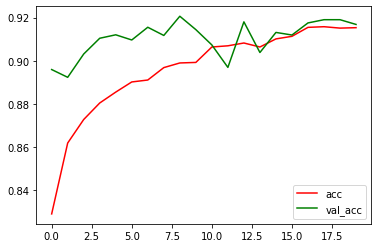

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()


In [11]:
model.evaluate(x = X_test, y = Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2435 - accuracy: 0.9168


[0.24348331987857819, 0.9168000221252441]